# Online store "Streamchik"

## Description

**"Streamchik"** is an online store that sells computer games all over the world.

We have been provided with data on game sales up to 2016. This data presents historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation).

To find patterns that affect the success of games is **the goal of the project**. This will allow us  to bet on a potentially popular product and plan advertising campaigns.

## 1. Data exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv') 
except:
    df = pd.read_csv('games.csv')
df.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Columns description

- Name — the name of the game
- Platform — platform
- Year_of_Release — year of release
- Genre — the genre of the game
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critics' score (maximum 100)
- User_Score — user rating (maximum 10)
- Rating — rating from the ESRB organization (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

**Conclusion 1.** There are 16715 rows in the table. There are missing values in 5 of the 11 columns of the dataset. The data is provided from 1980 to 2016.

## 2. Data preprocessing

Let's reduce all column names to lowercase.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df = df.rename(columns = str.lower)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's check for obvious duplicates and delete them if necessary.

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

There are missing values in the columns:
- name, 
- year_of_release, 
- critic_score, 
- user_score and rating.

Let's examine each column in order

In [9]:
df['name'].unique() 

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [10]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's check the year_of_release column for omissions, as well as their share in the dataset.

In [11]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
df['year_of_release'].isna().sum()/16714

0.01609429221012325

Because the percentage of missing values is less than 2%, we will delete these omissions.

In [13]:
df = df.dropna(subset=['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's check column `genre`

In [14]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are only 2 missing values, so we will delete them from the dataset

In [15]:
df = df.dropna(subset=['genre'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's check column `critic_score`

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

More than half of the data has been skipped, so we will not replace the omissions with numerical values and other metrics at this moment. The missing values may be due to the fact that half of the games were not appreciated by critics at all.

Let's explore a column with user ratings (user_score).

In [17]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Among the unique values there is **tbd**. It may be implied that users have just started playing this game and it takes time to complete the game to make an assessment, so the assessment still needs to be determined. Let's check the share of the **tbd** estimate

In [18]:
df.groupby('user_score')['user_score'].count()

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       5
9.6       2
9.7       1
tbd    2376
Name: user_score, Length: 96, dtype: int64

In [19]:
2424/16715

0.1450194436135208

The share of tbd is 14%. To further investigate the data, replace this value and the missing ones with NaN.

In [20]:
df['user_score'] = df['user_score'].fillna('NaN')
df['user_score'] = df['user_score'].replace('tbd','NaN')
df['user_score'].unique()

array(['8', 'NaN', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Let's check column `rating`

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The ESRB rating system is common in the USA and Canada. Probably, this rating does not apply in other countries, due to the presence of local developers and platforms. Since more than half of the values are missing, at this stage we will replace the omissions with the value "unknown_rating"

In [22]:
df['rating'] = df['rating'].fillna('unknown_rating')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Next, we will convert the columns year_of_release and critic_score to an integer type, since the first indicates the year, and the second indicates the critics' rating .

In [23]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Taking into account the factors considered, data preprocessing was carried out.

Next, we will calculate the total sales in all regions and add it to a separate column.

In [24]:
df['all_regions_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown_rating,31.38


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int64  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  all_regions_sales  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


****Conclusion 2.** The data is preprocessed. Additionally, a column on total sales in all regions has been added.

In [26]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': number NaN',temp[col_l].isna().sum(),
        ', % NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int64  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16444 non-null  object 
 11  all_regions_sales  16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Cha

## 3. Data research

To investigate the factors influencing the success of game sales, let's examine the number of games released in different years.

Text(0, 0.5, 'Total sum of games')

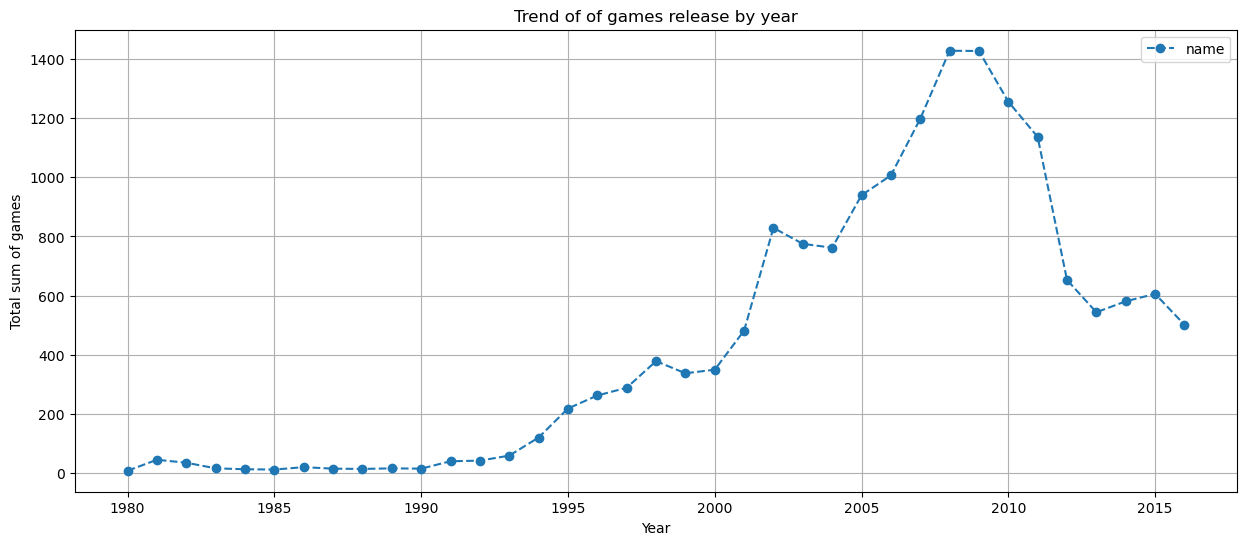

In [59]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of of games release by year')
plt.xlabel('Year')
plt.ylabel('Total sum of games')

According to the plot, we can see that the growth of games begins in the period from 1994 and a sharp increase since 2000, reaching peak values in 2008 and 2009, respectively. At the same time, the number of games sold has been decreasing since 2010.

At this stage, let's look at how the sales of games by platforms have changed. to begin with, let's choose the platforms with the highest total sales

In [28]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
len(df['platform'].unique())

31

In [30]:
df_all_platforms_sales=df.pivot_table(index='platform', values = 'all_regions_sales', aggfunc='sum')
df_all_platforms_sales.sort_values(by = 'all_regions_sales',ascending=False).style.bar()

,all_regions_sales
platform,
PS2,1233.560000
X360,961.240000
PS3,931.340000
Wii,891.180000
DS,802.780000
PS,727.580000
PS4,314.140000
GBA,312.880000
PSP,289.530000


According the information above:
1. TOP-6 gaming platforms for all time provided in the dataset, with a total number of sales of more than 500 million copies: PS2, X360, Wii, PS3, DS, PSP.
2. 12 platforms have sales from 100 to 500 million copies.

To begin with, let's get a chart of the TOP 6 games by the number of copies sold (more than 500 million pcs).

Text(0, 0.5, 'Sum of copies, millions')

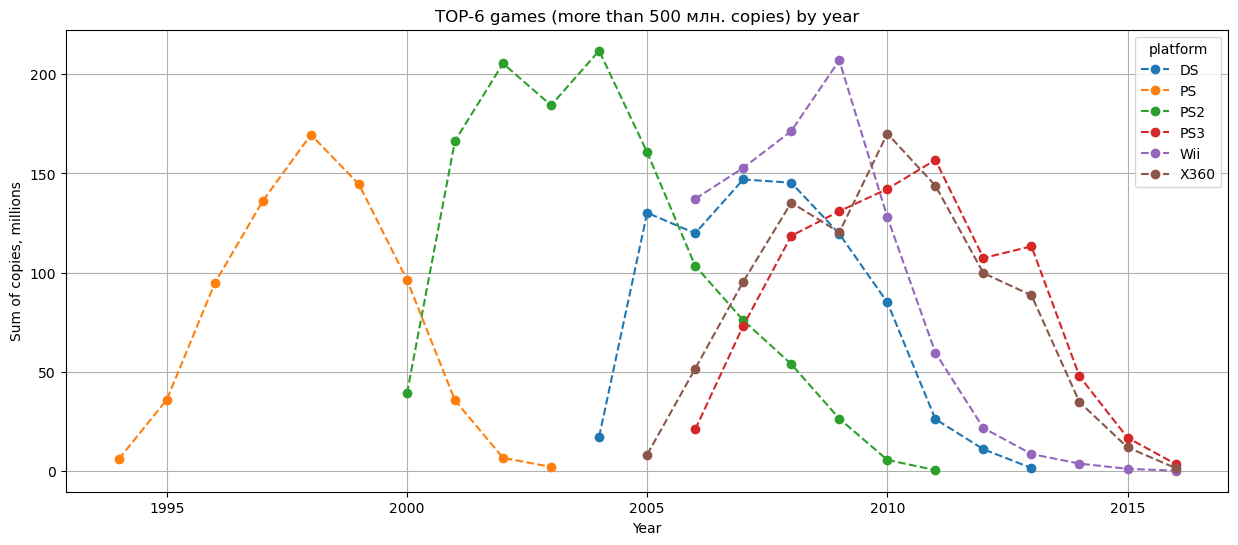

In [60]:
top_6_platform = df.query('platform in ["PS2", "X360", "Wii", "PS3","DS", "PS"]')
top_6_platform.pivot_table(index='year_of_release', 
                           columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('TOP-6 games (more than 500 млн. copies) by year')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

We see an outlier (abnormal) value for sales of games on the DS platform on the chart. The graph shows that the start of sales of games on this platform begins in 2004. Let's check the DS data for 1985.

In [32]:
top_6_platform.query('year_of_release == 1985 and platform =="DS"').head(100)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown_rating,0.02


Accoring the data, in 1985 1 game was released on the DS platform, which was sold only in Japan (20 thousand copies of copies were sold in total).

By the way, it was not sold in other markets, and there is no information about the ratings of users and critics, we can assume 2 options.
1) The DS 1985 game was not in demand on the world market, so there is no more information about it.
2) This is a single anomaly and it can be excluded from the study.

So we can exclude this line from the study.

In [33]:
df = df.drop(labels = [15957],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16443 non-null  object 
 1   platform           16443 non-null  object 
 2   year_of_release    16443 non-null  int64  
 3   genre              16443 non-null  object 
 4   na_sales           16443 non-null  float64
 5   eu_sales           16443 non-null  float64
 6   jp_sales           16443 non-null  float64
 7   other_sales        16443 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         7463 non-null   float64
 10  rating             16443 non-null  object 
 11  all_regions_sales  16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Let's build that plot again.

Text(0.5, 0, 'Sum of copies, millions')

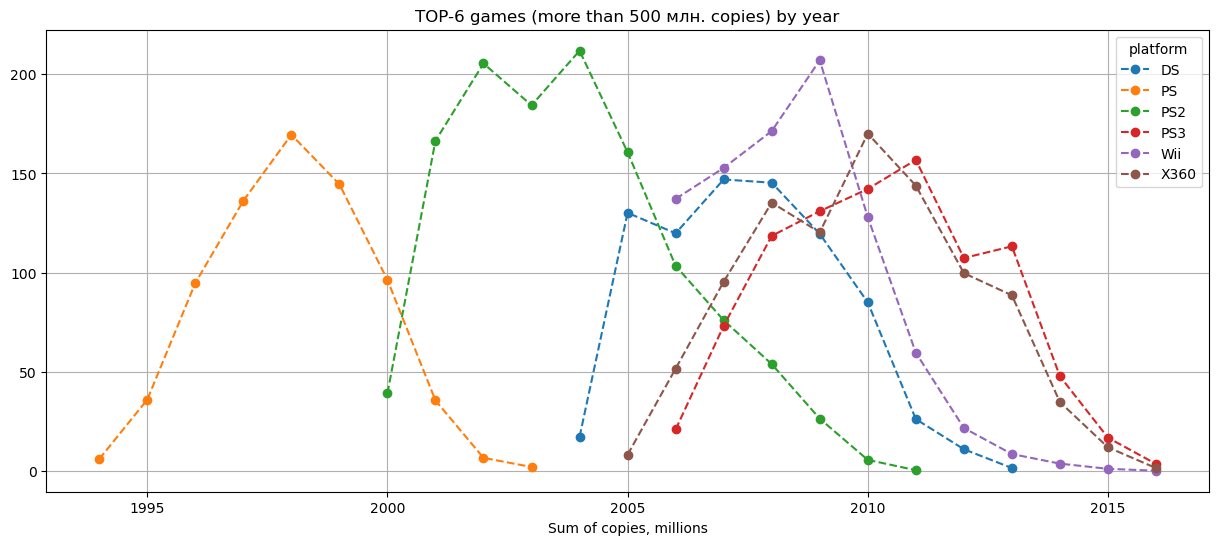

In [61]:
df.query('platform in ["PS2", "X360", "Wii", "PS3","DS", "PS"]').pivot_table(index='year_of_release', 
                           columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                           plot(style='o--', figsize=(15, 6), grid=True)

plt.title('TOP-6 games (more than 500 млн. copies) by year')
plt.xlabel('Sum of copies, millions')

The graph shows the dynamics of sales of platforms with the largest total sales.

The peak values of copies sold in 1 year exceed 200 million copies.

On average, sales on platforms with the highest total sales occur within 9 years. After 9 years, total sales tend to 0.
On average, after 4 years, the old platforms disappear.

As a rule, a new gaming platform enters the market in 4-6 years.

Now we will display the 1st part of 6 games in terms of sales (from 100 to 500 million units)

Text(0, 0.5, 'Sum of copies, millions')

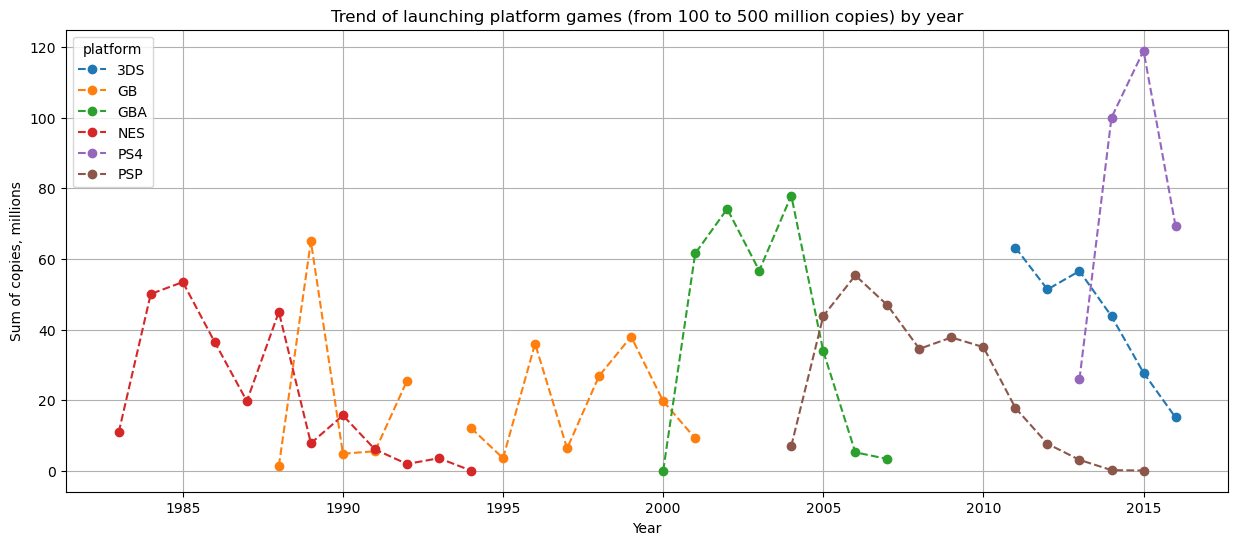

In [62]:
df.query('platform in ["GBA", "PS4", "PSP", "GB","NES", "3DS"]').\
    pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of launching platform games (from 100 to 500 million copies) by year')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

Now we will display the 2nd part of 6 games in terms of sales (from 100 to 500 million units)

Text(0, 0.5, 'Sum of copies, millions')

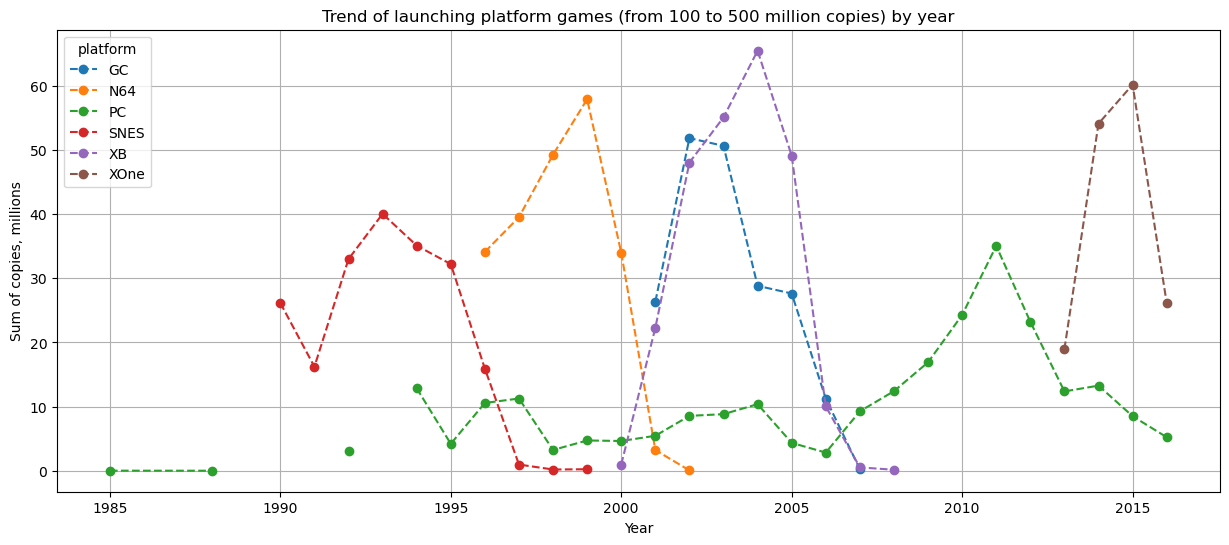

In [63]:
df.query('platform in ["XB", "PC", "N64", "SNES","GC", "XOne"]').\
    pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(15, 6), grid=True)

plt.title('Trend of launching platform games (from 100 to 500 million copies) by year')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

The situation for the 3rd six is also less homogeneous than for the TOP 6. At the same time, it should be noted that PC games have been released for more than 10 years and do not leave the market. In the future, you should pay attention to the sale of PC games.

Now let's look at the dynamics of sales across all platforms.

Text(0, 0.5, 'Sum of copies, millions')

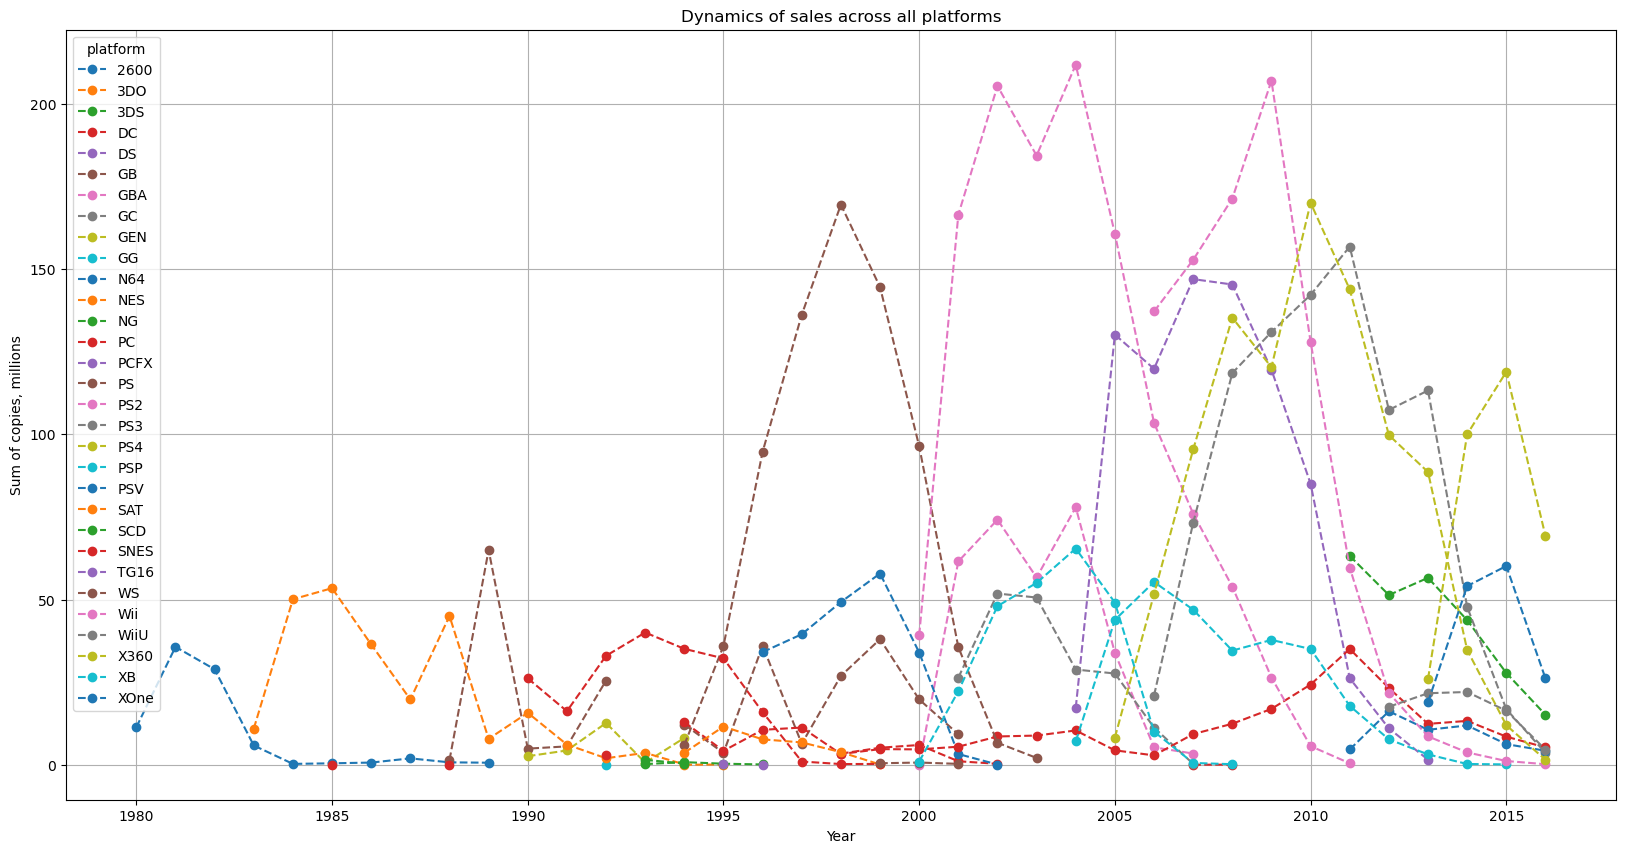

In [64]:
df.pivot_table(index='year_of_release', 
               columns = 'platform',values='all_regions_sales', aggfunc='sum').\
               plot(style='o--', figsize=(20, 10), grid=True)

plt.title('Dynamics of sales across all platforms')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

According to obtained graphs, it remains to determine the actual sales period for subsequent analysis. That means:

1) sales growth begins approximately from 1995
2) some platforms (especially the TOP 6) will cease to exist by 2013

then as the **current period** for the sales forecast for 2017, we will take data from **2013** by **2016**.

Text(0, 0.5, 'Sum of copies, millions')

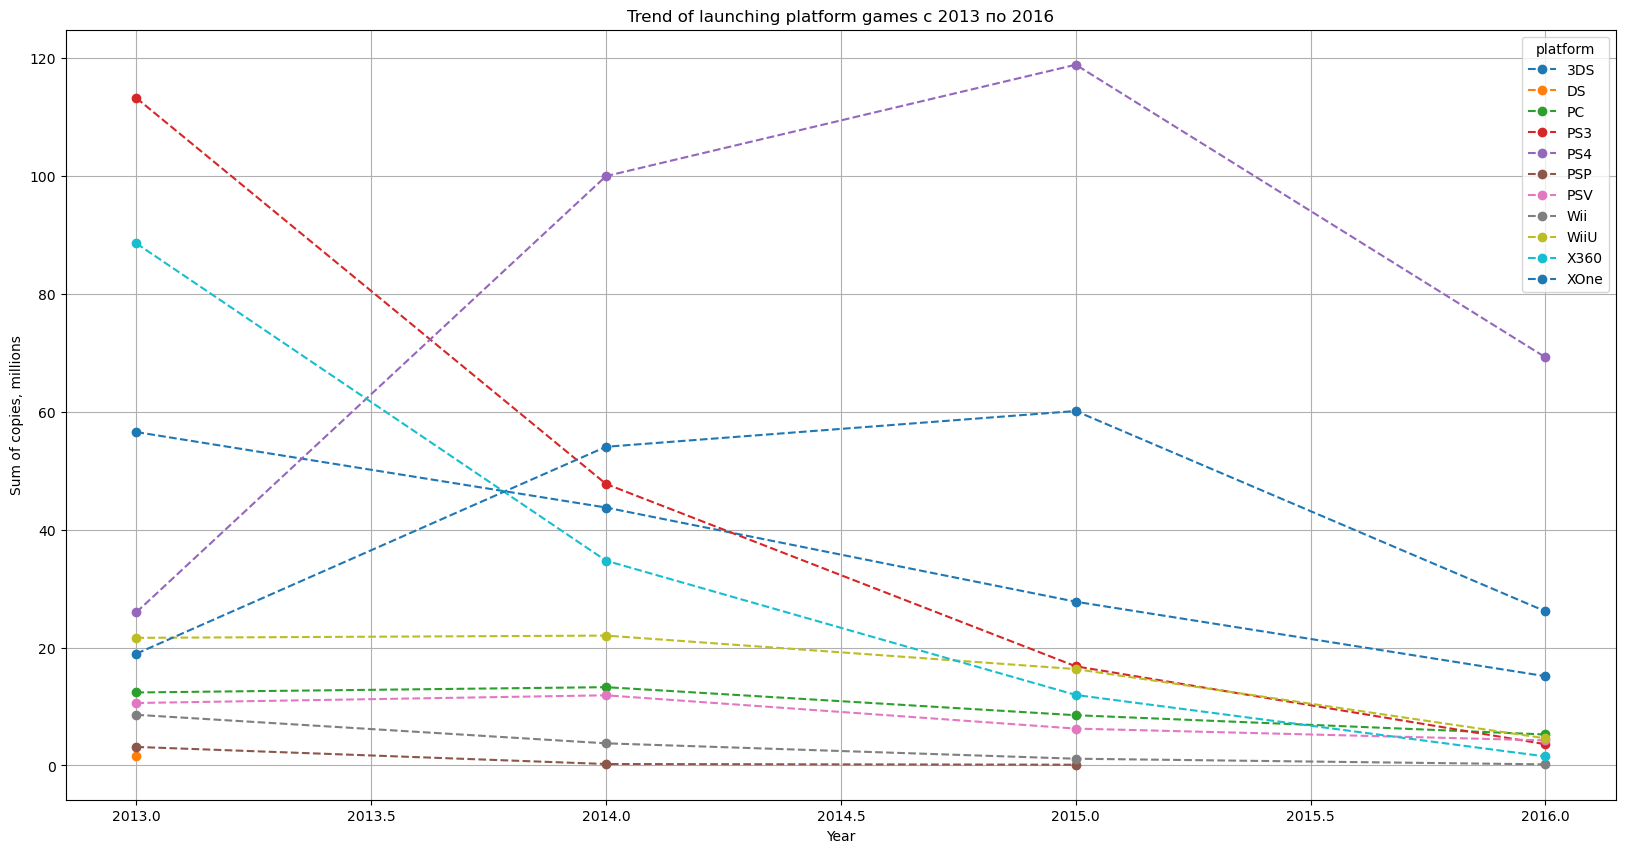

In [67]:
actual_platforms= df.query('year_of_release >= 2013')

actual_platforms.pivot_table(index='year_of_release', 
                columns = 'platform',values='all_regions_sales', aggfunc='sum').\
                plot(style='o--', figsize=(20, 10), grid=True)

plt.title('Trend of launching platform games с 2013 по 2016')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

**Conclusion 3.1.** According to obtained graphs, you can see that:

1) For the current period (2013-2016), "PS4" and "XOne" are leading in terms of sales.

2) Sales of "PS3", "X360", 3DS platforms are falling significantly. This is probably due to the release of new platforms from these companies and the expectation of new games

3) It should be noted the relative stability in sales (with a slight decrease) in RS.

Therefore, it can be assumed that the most potentially profitable platforms when building a forecast for 2017 will be PS4, XOne, PC.

Text(0, 0.5, 'Sum of copies, millions')

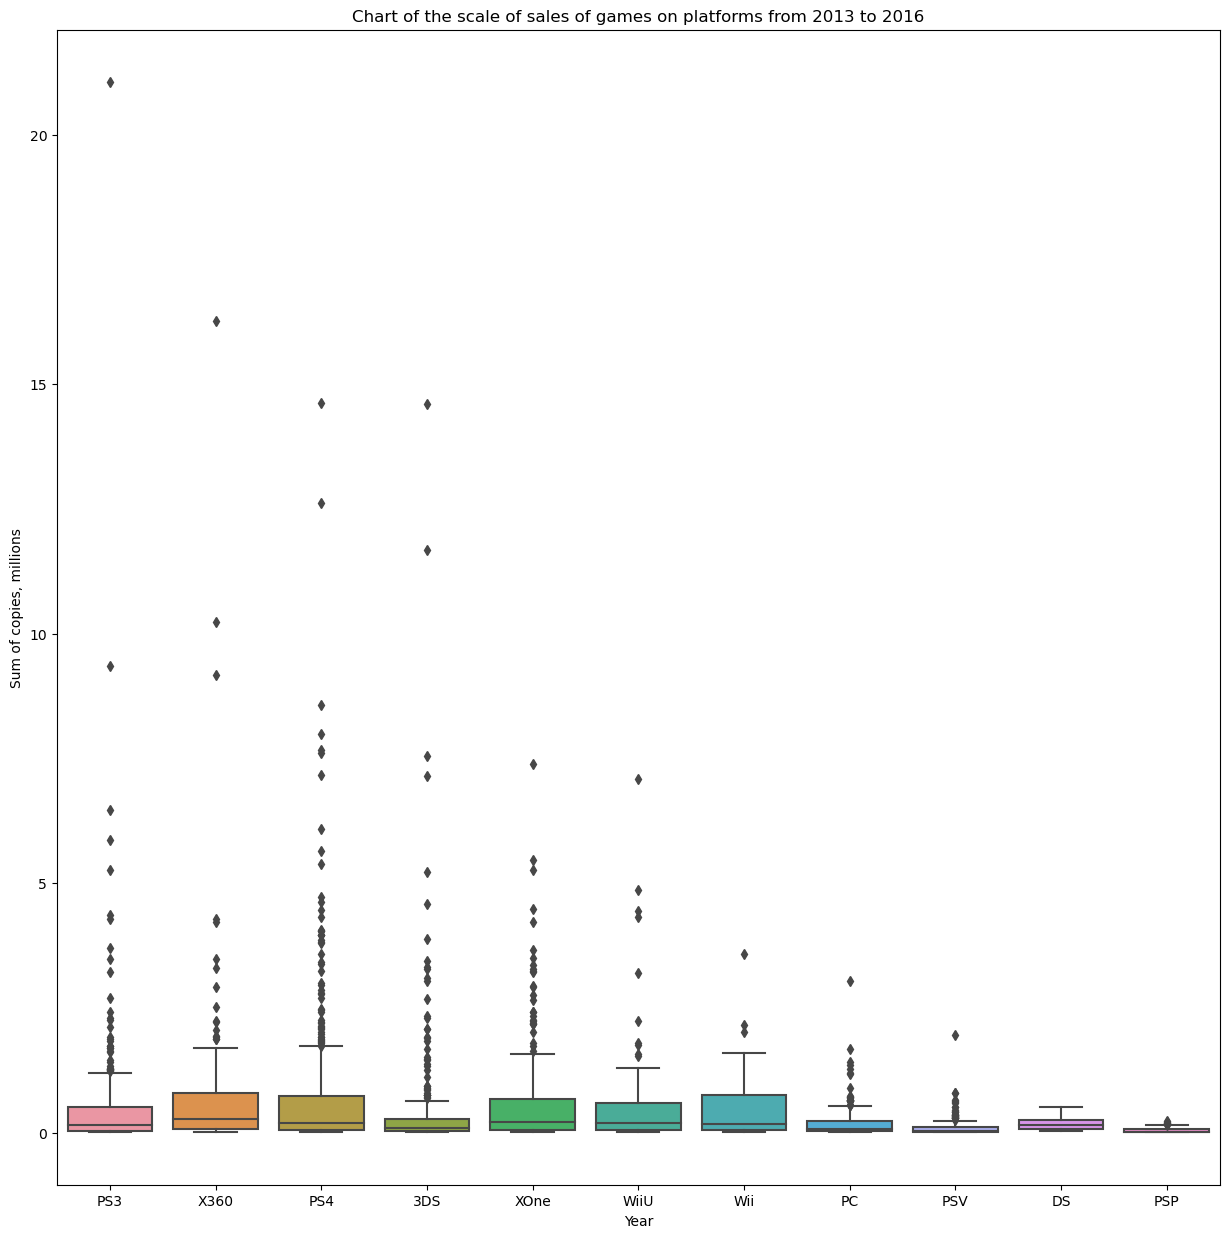

In [69]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='platform').set(title = 'Global sales by platforms',
                                                                        xlabel = 'Platforms',
                                                                        ylabel = 'General sales')

plt.title('Chart of the scale of sales of games on platforms from 2013 to 2016')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

Text(0, 0.5, 'Sum of copies, millions')

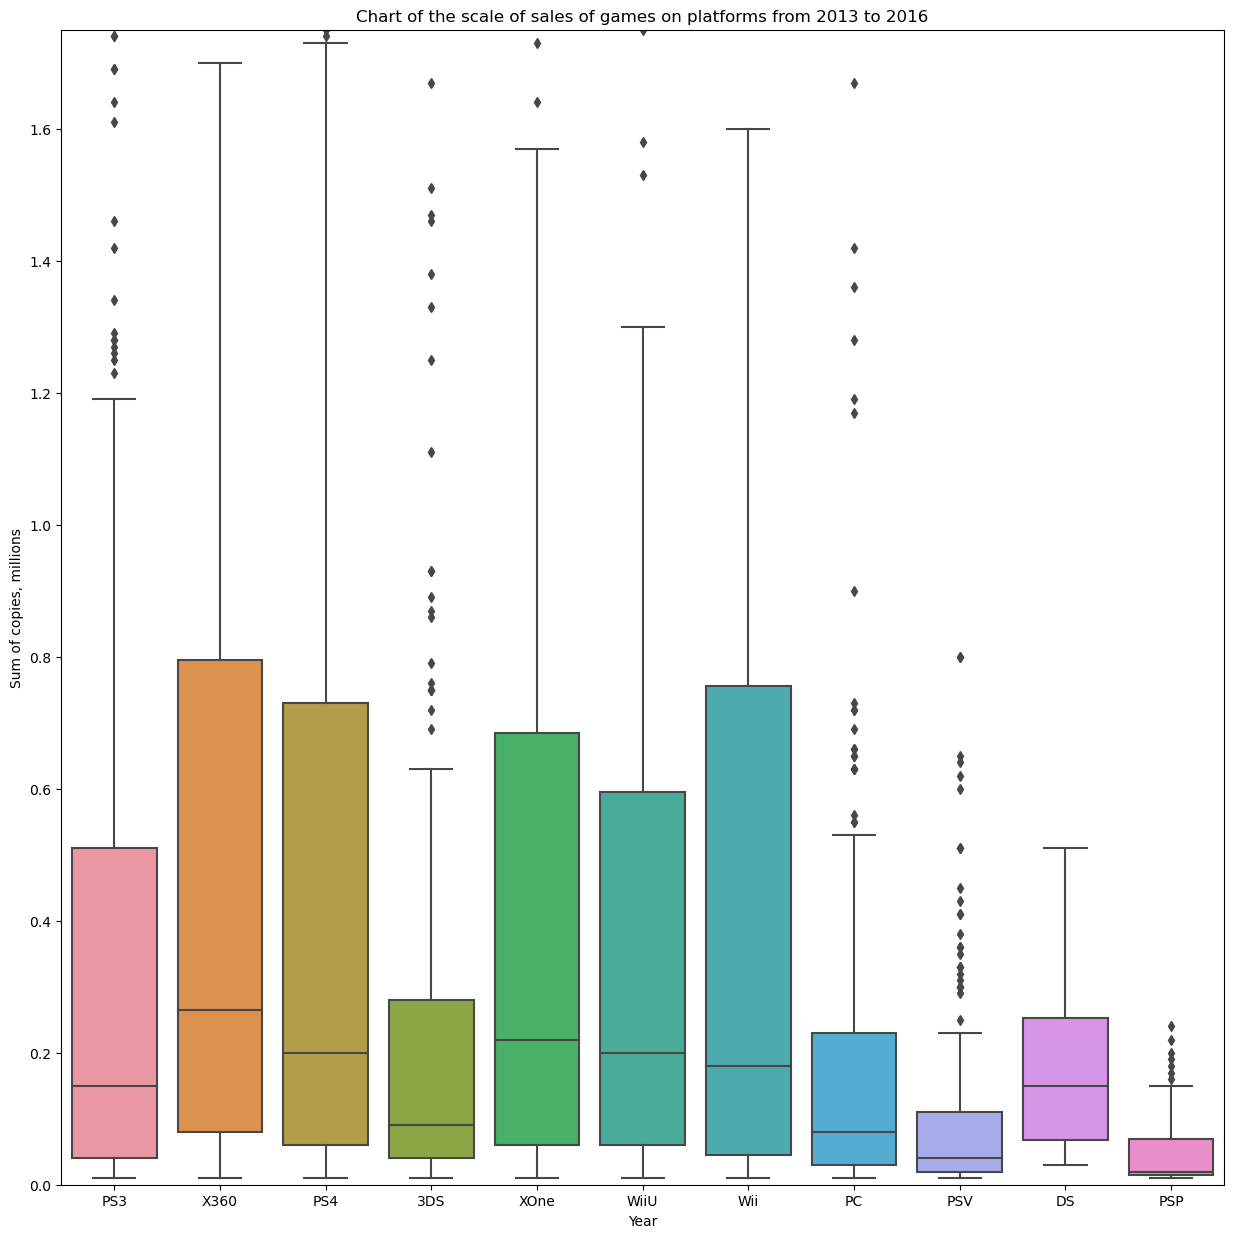

In [70]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='platform').set(title = 'Global sales by platforms',
                                                                        xlabel = 'Platforms',
                                                                        ylabel = 'General sales')
plt.ylim(0,1.75)
plt.title('Chart of the scale of sales of games on platforms from 2013 to 2016')
plt.xlabel('Year')
plt.ylabel('Sum of copies, millions')

The data shows that the most popular platforms for the current period are PS3, X360, PS4, XOne, WiiU, Wii.

In [41]:
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Let's look at how the sales inside the popular platform are affected by user reviews and critics.

To begin with, let's take one popular platform. For example, PS4.


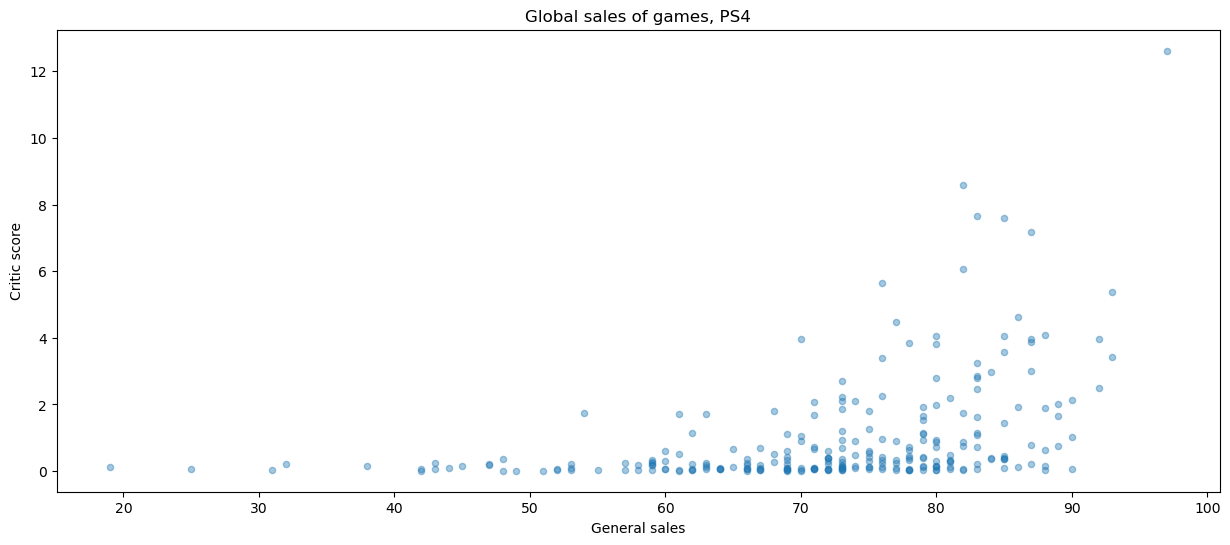

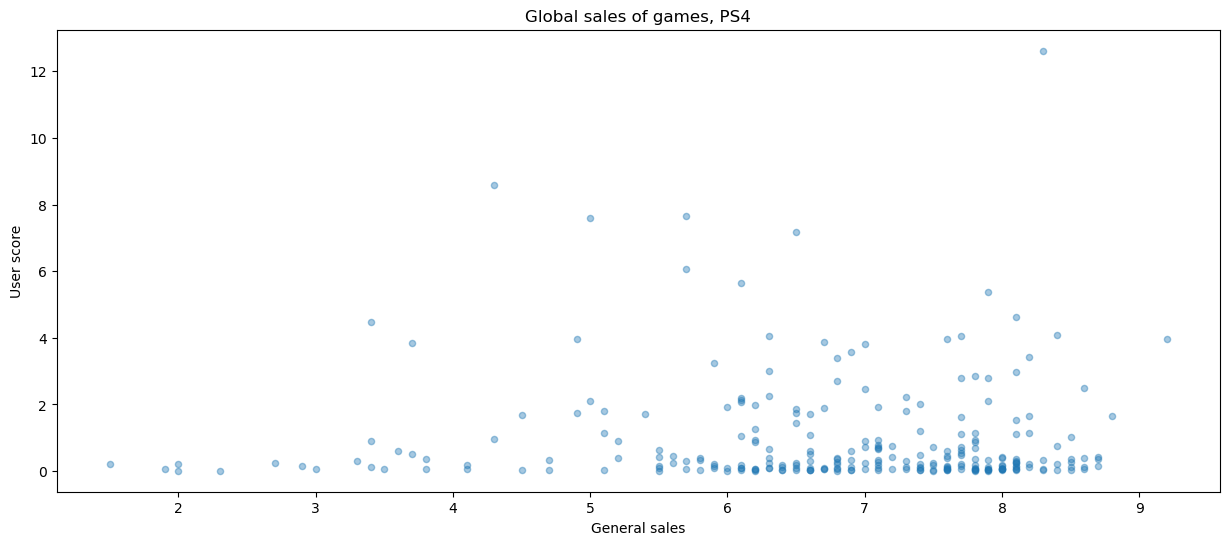

In [71]:
ps4_platform = actual_platforms.query('platform == "PS4"').reset_index()

ps4_critic=ps4_platform.plot(x='critic_score',y='all_regions_sales',kind='scatter',alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PS4',
         xlabel = 'General sales',
         ylabel = 'Critic score')
plt.show()
ps4_users=ps4_platform.plot(x='user_score',y='all_regions_sales',kind='scatter',alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PS4',
         xlabel = 'General sales',
         ylabel = 'User score')
plt.show()

In [72]:
ps4_corr_critic = ps4_platform['critic_score'].corr(ps4_platform['all_regions_sales'])

ps4_corr_user = ps4_platform['user_score'].corr(ps4_platform['all_regions_sales'])
print(f'Correlation coefficient between critics ratings and total sales of games on the PS4 platform = {ps4_corr_critic}')
print(f'Correlation coefficient between user ratings and total sales of games on the PS4 platform = {ps4_corr_user}')

Correlation coefficient between critics ratings and total sales of games on the PS4 platform = 0.4065679020617815
Correlation coefficient between user ratings and total sales of games on the PS4 platform = -0.031957110204556466


**Conclusion 3.2.** The relationship between critics' ratings and total sales of games on the PS4 platform is not linear (the correlation is weak), while there is a trend: with an increase in critics' ratings, the number of sales of copies of games increases.

It should also be noted that there is practically no relationship between user ratings and total sales.

Let's check other platforms.

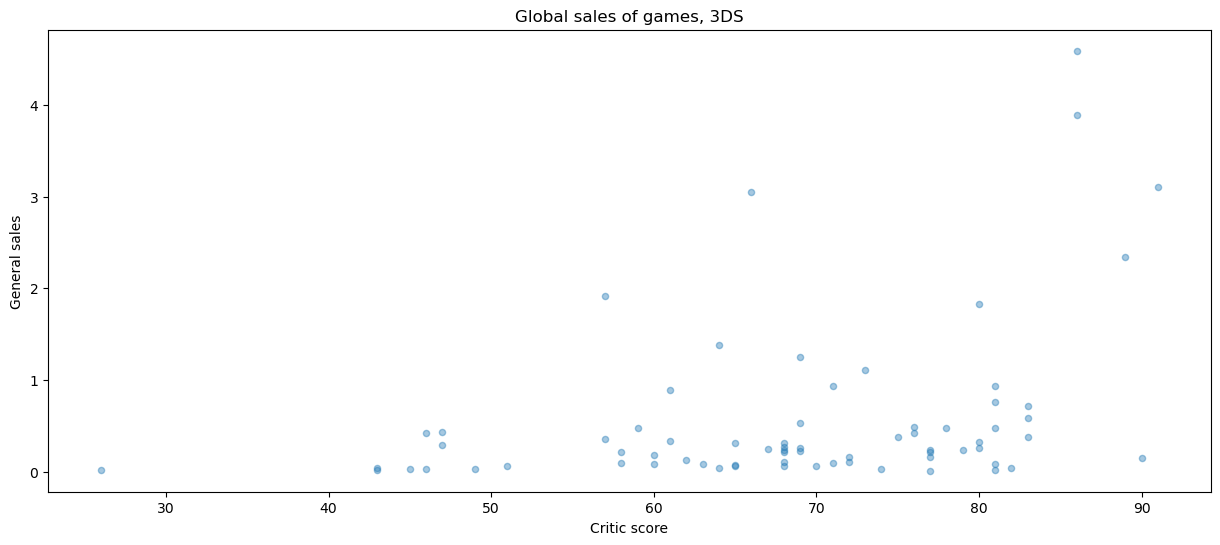

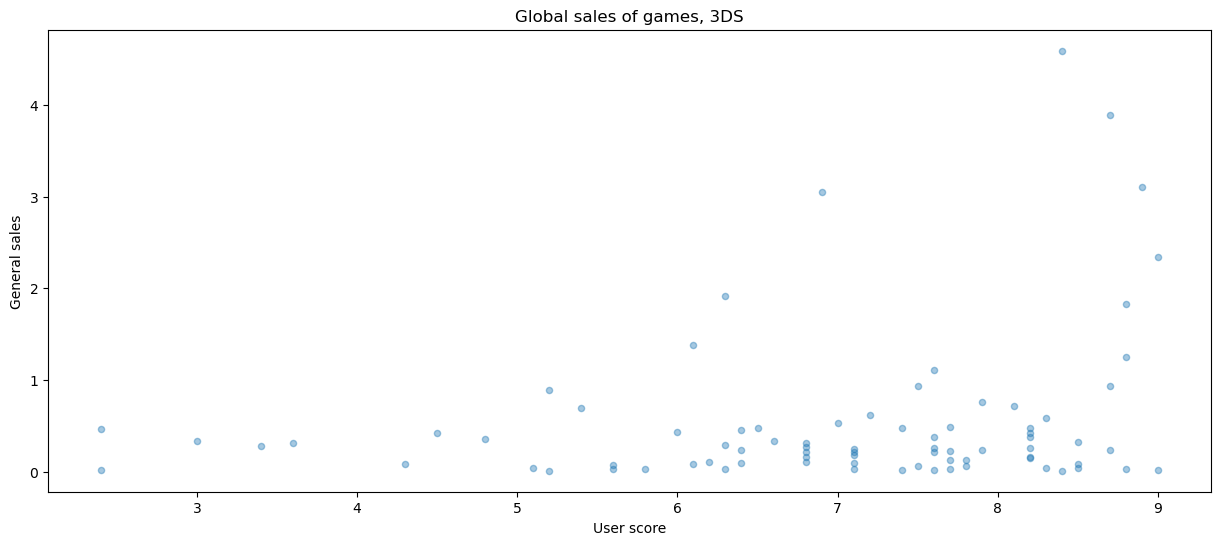

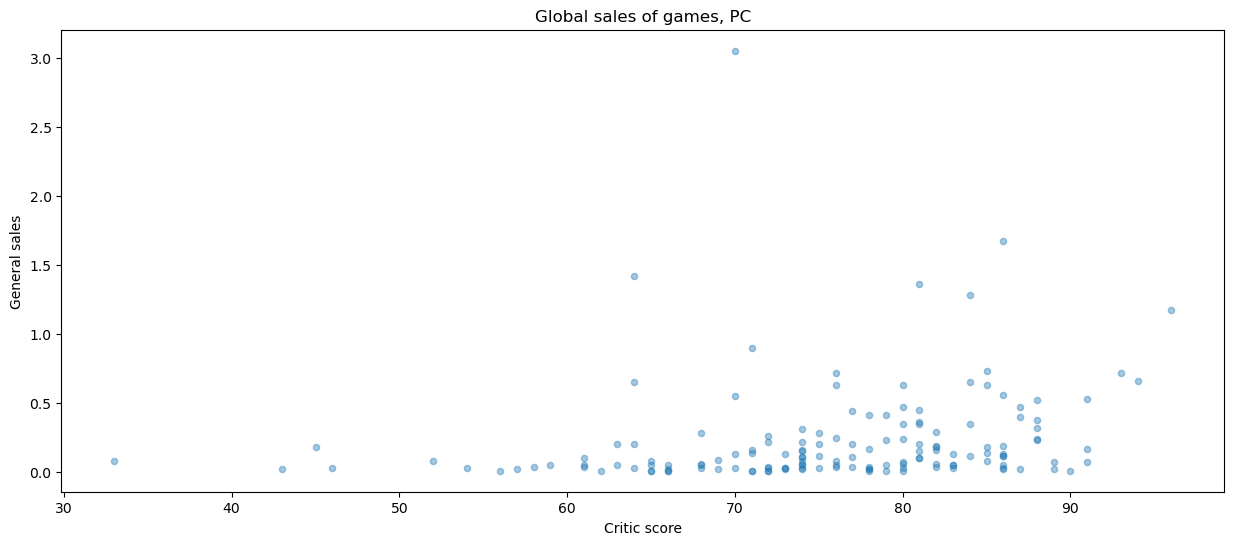

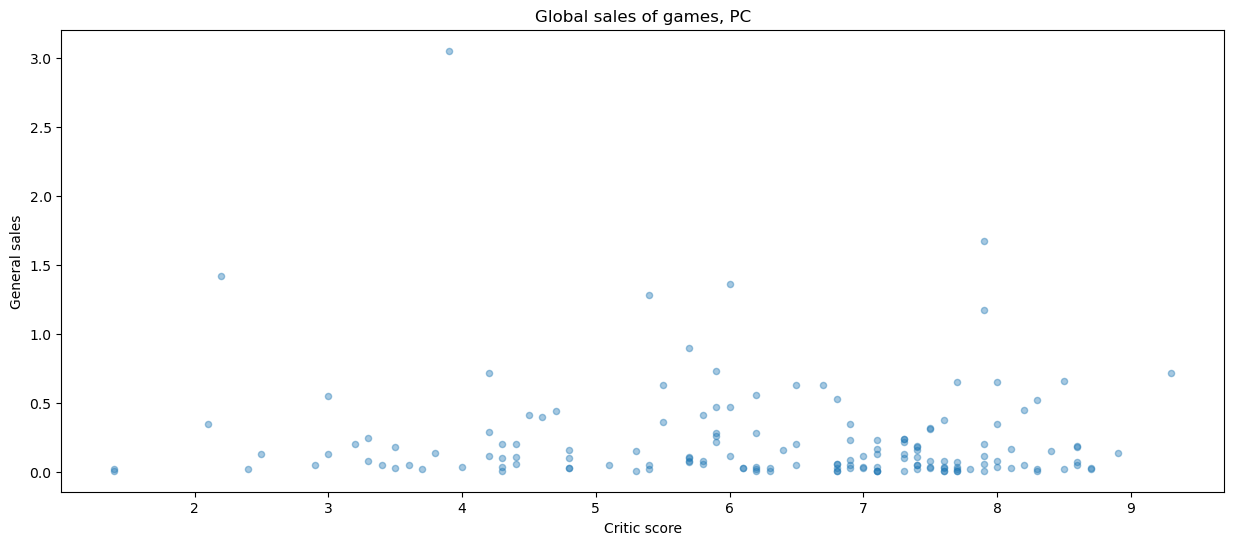

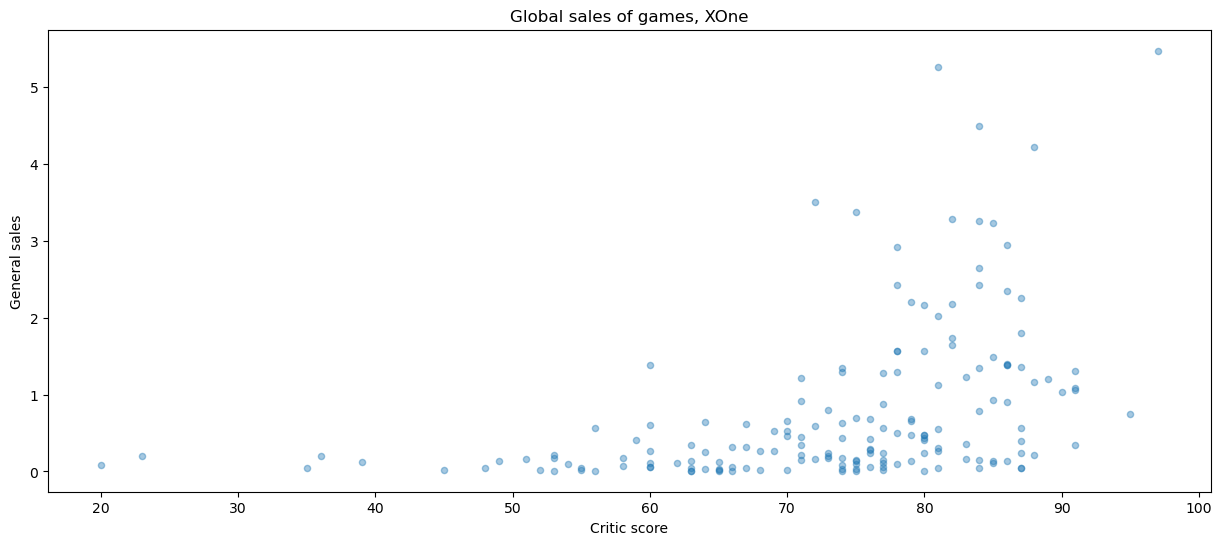

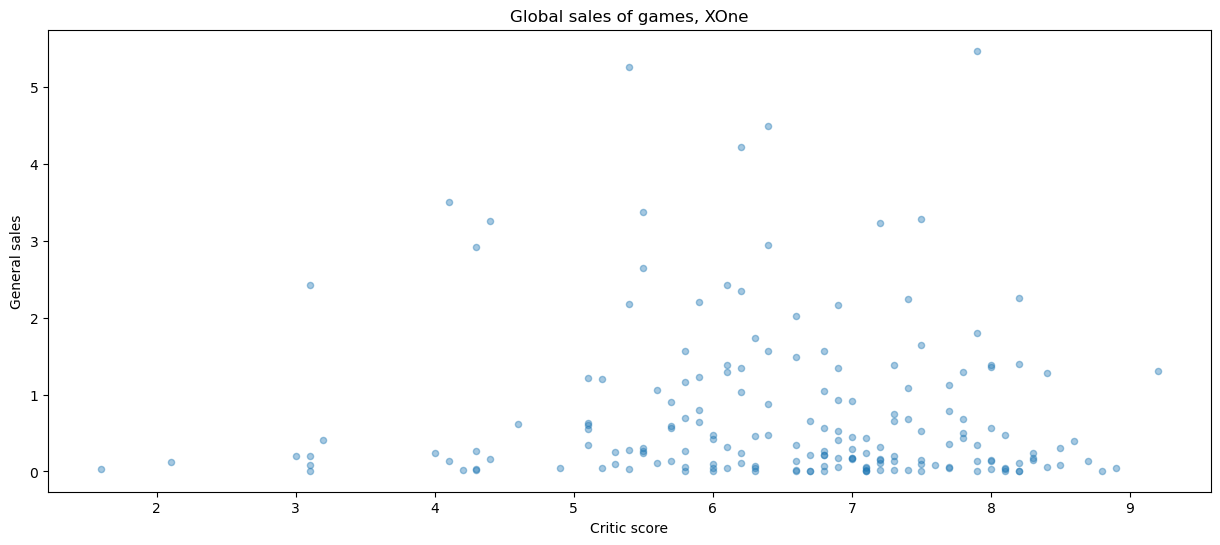

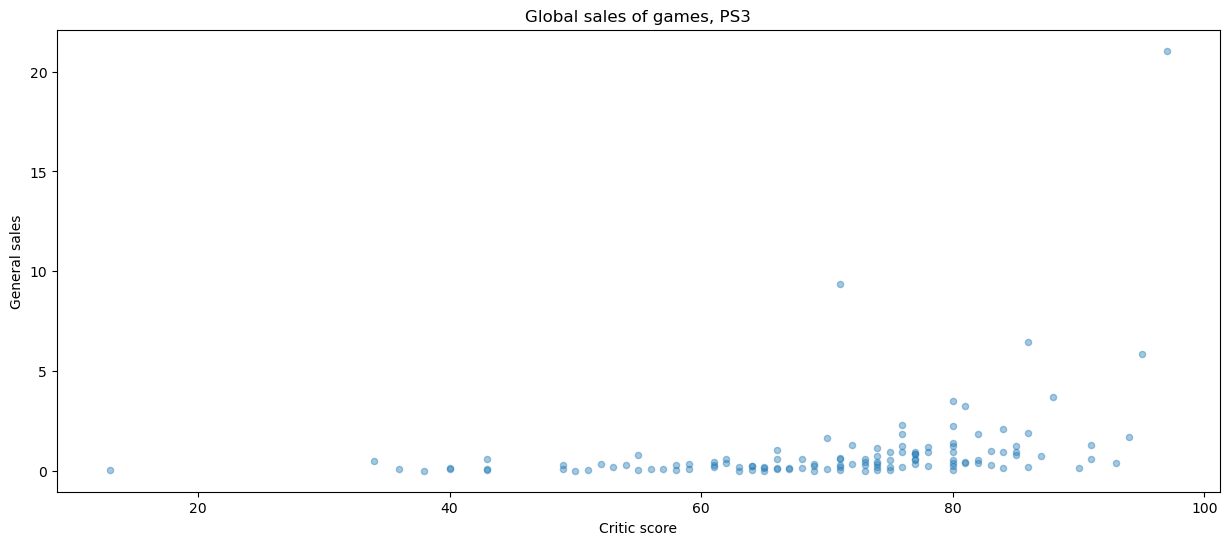

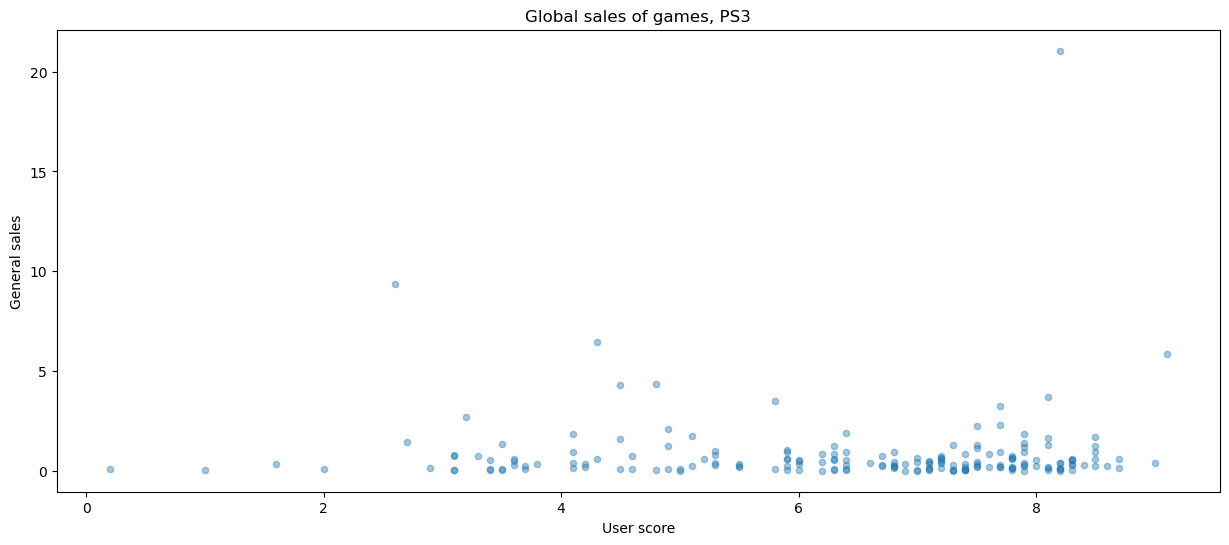

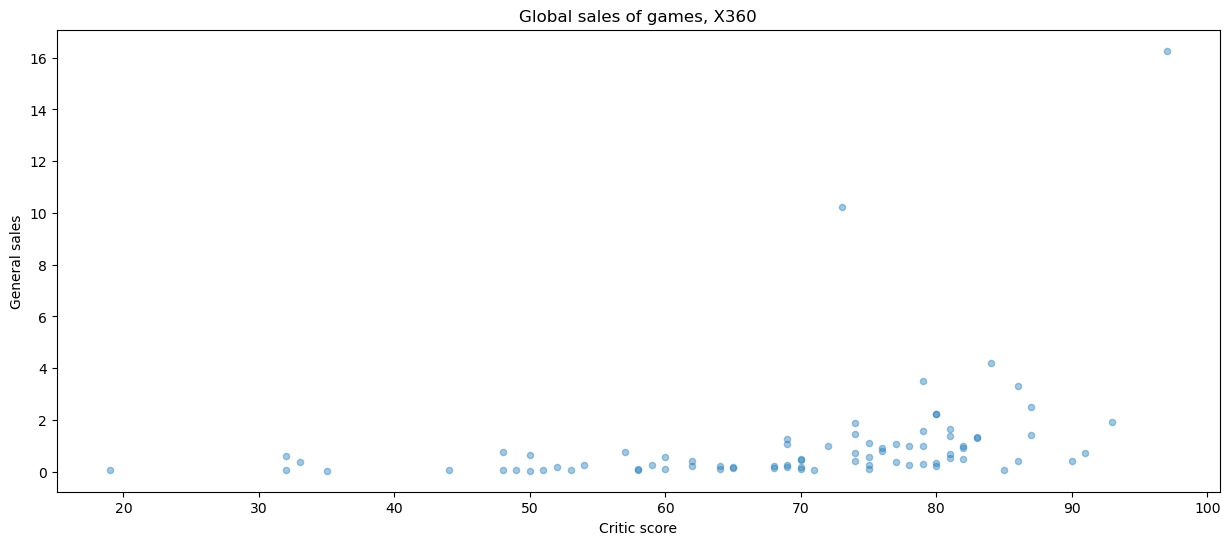

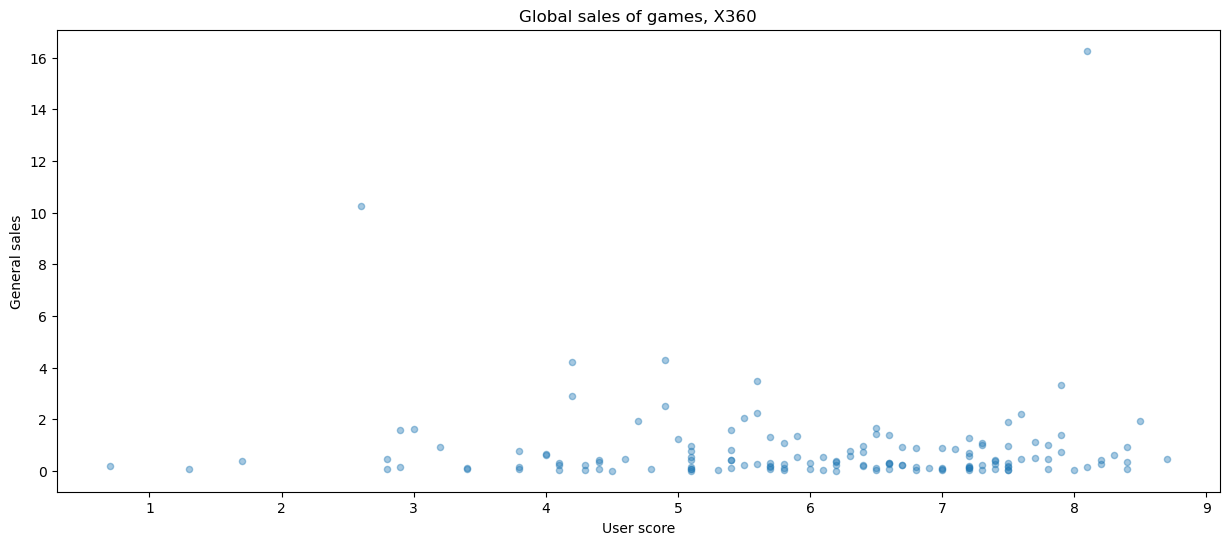

In [73]:
three_ds_platform = actual_platforms.query('platform == "3DS"').reset_index()
pc_platform = actual_platforms.query('platform == "PC"').reset_index()
x_one_platform = actual_platforms.query('platform == "XOne"').reset_index()
ps_3_platform = actual_platforms.query('platform == "PS3"').reset_index()
x_360_platform = actual_platforms.query('platform == "X360"').reset_index()

three_ds_critic = three_ds_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, 3DS', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()
three_ds_users = three_ds_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, 3DS', 
                                                                         xlabel = 'User score',
                                                                         ylabel = 'General sales')
plt.show()
pc_critic = pc_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PC', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()

pc_users = pc_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PC', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()
x_one_critic = x_one_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, XOne', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()

x_one_users = x_one_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, XOne', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')


plt.show()
ps_3_critic = ps_3_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PS3', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()

ps_3_user = ps_3_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, PS3', 
                                                                         xlabel = 'User score',
                                                                         ylabel = 'General sales')

plt.show()
x_360_critic = x_360_platform.plot(x='critic_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, X360', 
                                                                         xlabel = 'Critic score',
                                                                         ylabel = 'General sales')
plt.show()

x_360_users = x_360_platform.plot(x='user_score',
                                         y='all_regions_sales', kind='scatter'
                                         ,alpha=0.4, figsize=(15,6)).set(title = 'Global sales of games, X360', 
                                                                         xlabel = 'User score',
                                                                         ylabel = 'General sales')



Let's calculate the correlation coefficients.

In [74]:
three_ds_corr_critic = three_ds_platform['critic_score'].corr(three_ds_platform['all_regions_sales'])
three_ds_corr_user = three_ds_platform['user_score'].corr(three_ds_platform['all_regions_sales'])
pc_corr_critic = pc_platform['critic_score'].corr(pc_platform['all_regions_sales'])
pc_corr_user = pc_platform['user_score'].corr(pc_platform['all_regions_sales'])
x_one_corr_critic = x_one_platform['critic_score'].corr(x_one_platform['all_regions_sales'])
x_one_corr_user = x_one_platform['user_score'].corr(x_one_platform['all_regions_sales'])
ps_3_corr_critic = ps_3_platform['critic_score'].corr(ps_3_platform['all_regions_sales'])
ps_3_corr_user = ps_3_platform['user_score'].corr(ps_3_platform['all_regions_sales'])
x_360_corr_critic = x_360_platform['critic_score'].corr(x_360_platform['all_regions_sales'])
x_360_corr_user = x_360_platform['user_score'].corr(x_360_platform['all_regions_sales'])


print(f'Correlation coefficient between critics ratings and total game sales, 3DS = {three_ds_corr_critic}')
print(f'Correlation coefficient between user ratings and total game sales, 3DS = {three_ds_corr_user}')
print('')
print(f'Correlation coefficient between critics ratings and total game sales, PC = {pc_corr_critic}')
print(f'Correlation coefficient between user ratings and total game sales, PC = {pc_corr_user}')
print('')
print(f'Correlation coefficient between critics ratings and total game sales, XOne = {x_one_corr_critic}')
print(f'Correlation coefficient between user ratings and total game sales, XOne = {x_one_corr_user}')
print('')
print(f'Correlation coefficient between critics ratings and total game sales, PS3 = {ps_3_corr_critic}')
print(f'Correlation coefficient between user ratings and total game sales, PS3 = {ps_3_corr_user}')
print('')
print(f'Correlation coefficient between critics ratings and total game sales, X360 = {x_360_corr_critic}')
print(f'Correlation coefficient between user ratings and total game sales, X360 = {x_360_corr_user}')

Correlation coefficient between critics ratings and total game sales, 3DS = 0.3570566142288104
Correlation coefficient between user ratings and total game sales, 3DS = 0.2415041177356302

Correlation coefficient between critics ratings and total game sales, PC = 0.1960302829436937
Correlation coefficient between user ratings and total game sales, PC = -0.09384186952476745

Correlation coefficient between critics ratings and total game sales, XOne = 0.4169983280084016
Correlation coefficient between user ratings and total game sales, XOne = -0.06892505328279419

Correlation coefficient between critics ratings and total game sales, PS3 = 0.33428533933719196
Correlation coefficient between user ratings and total game sales, PS3 = 0.002394402735756673

Correlation coefficient between critics ratings and total game sales, X360 = 0.3503445460228666
Correlation coefficient between user ratings and total game sales, X360 = -0.011742185147181365


**Conclusion 3.3.**

The dependence of all platforms is not linear, while the following trend is observed: the higher the critics' rating, the higher the sales.

It should also be noted that there is no relationship between user ratings and game sales. This dependence is weakly expressed in the 3DS platform.

**Genres**

Let's look at genres which are the most popular among promising and all other platforms.

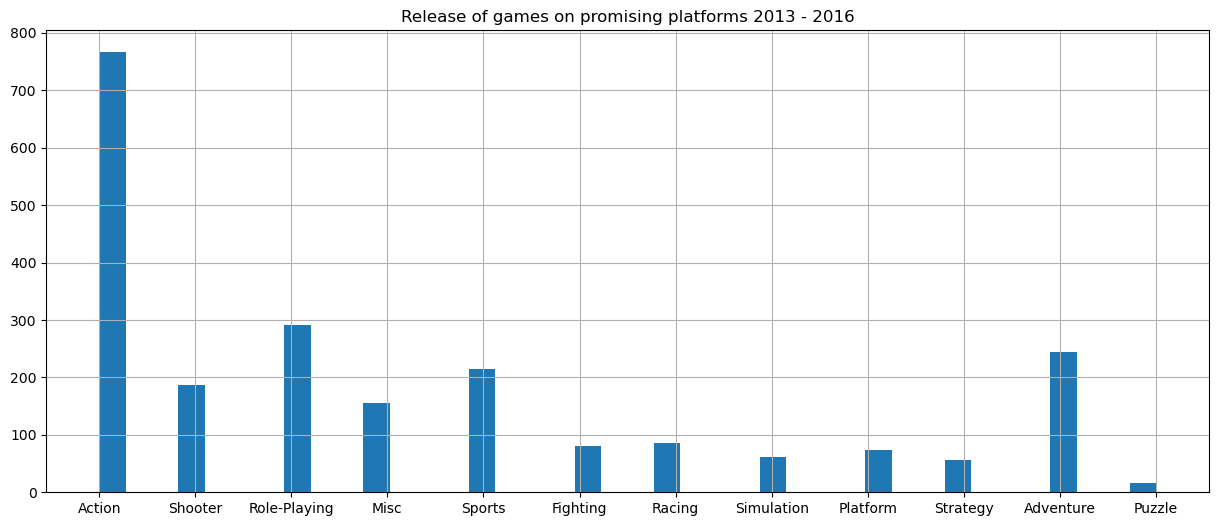

In [75]:
actual_platforms['genre'].hist(bins=40, figsize=(15,6))
plt.grid(True)
plt.title('Release of games on promising platforms 2013 - 2016')
plt.show()

Text(0, 0.5, 'Sum copies, mln')

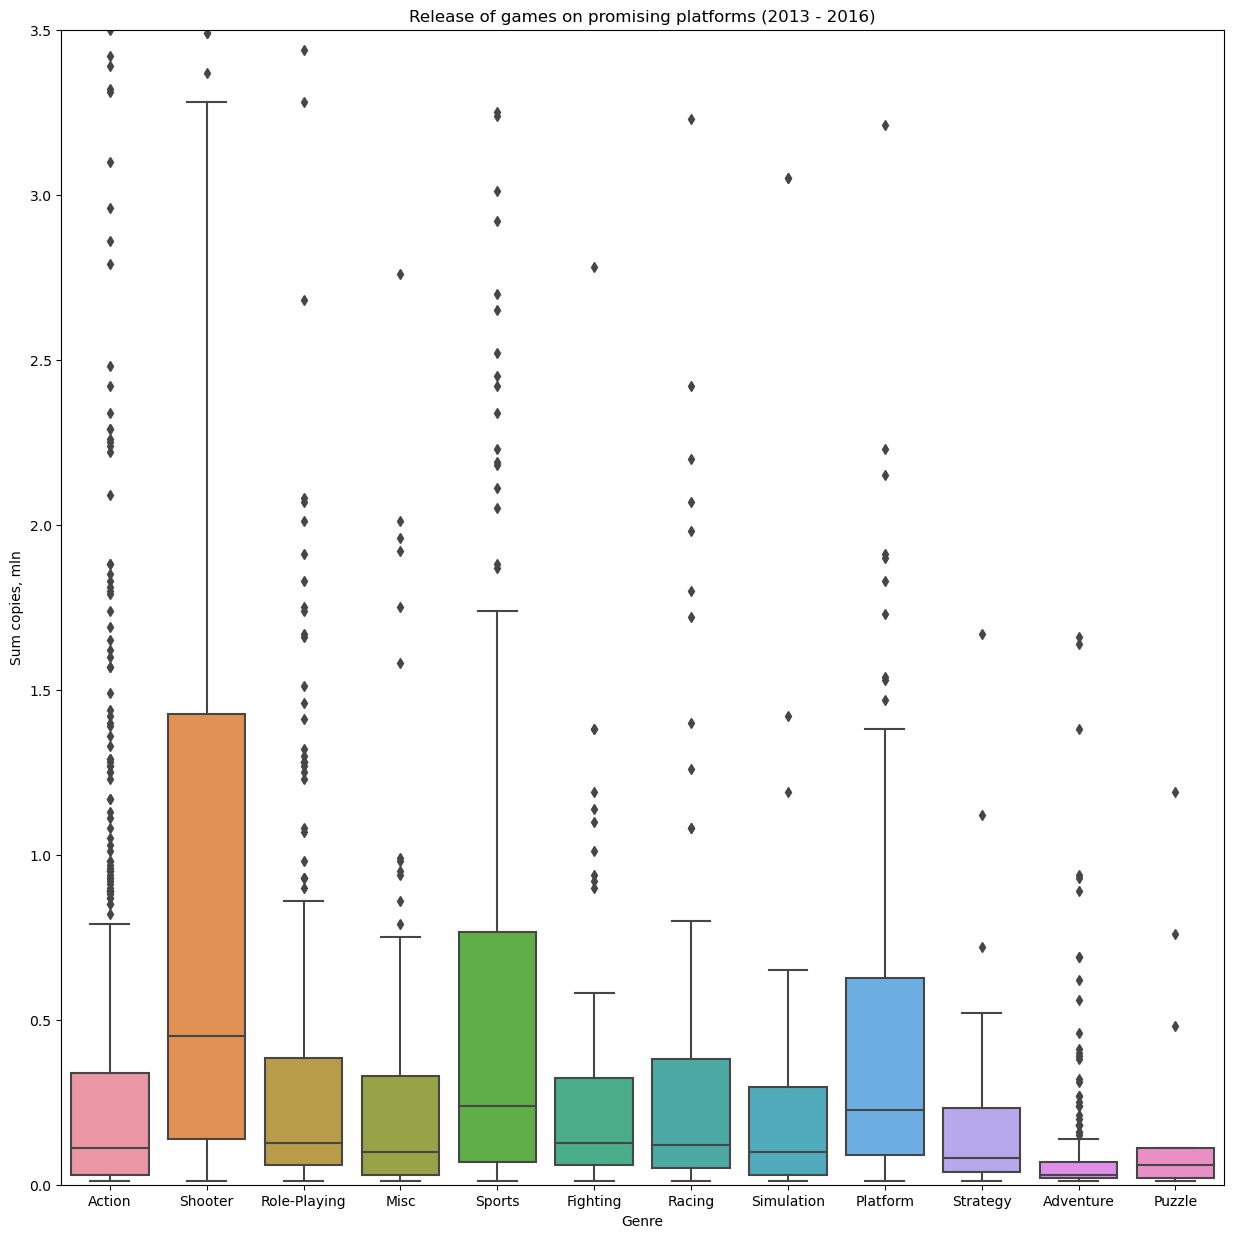

In [76]:
plt.figure(figsize=(15, 15))
sns.boxplot(data = actual_platforms, y = 'all_regions_sales', x='genre').set(title = 'Глобальные продажи по жанрам',
                                                                        xlabel = 'Жанры',
                                                                        ylabel = 'Общие продажи')
plt.ylim(0, 3.5)
plt.title('Release of games on promising platforms (2013 - 2016)')
plt.xlabel('Genre')
plt.ylabel('Sum copies, mln')

**Вывод 3.4.**

1) ТОП-5 жанров для перспективных платформ: Action, Shooter, Sports, Role-Playing, Adventure.

2) При этом наиболее стабилные прожажи (медианные значения) у жанров Shooter, Sports, Platforms. Можно предположить, что на данные жанры имеется стабильный спрос.

3) Низкие продажи игр в жанре Puzle.

## 4. Analysis of users by sales regions.

Now let's look directly at the game sales markets.

To begin with, let's look at which platforms are popular in different regions.

We will display the top 5 platforms in the regions of sales.

In [48]:
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


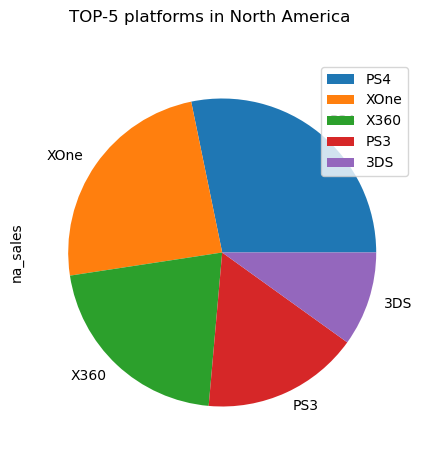

In [78]:
top_5_in_na =  actual_platforms.pivot_table(index='platform',
                                                    values='na_sales',
                                                    aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
print(top_5_in_na)
top_5_in_na.plot(kind='pie', subplots=True, title='ТОP-5 platforms in North America', figsize=(10,5))
plt.show()

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


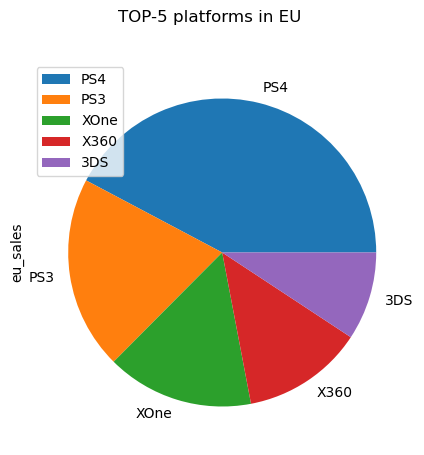

In [79]:
top_5_in_eu =  actual_platforms.pivot_table(index='platform',
                                                    values='eu_sales',
                                                    aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

print(top_5_in_eu)
top_5_in_eu.plot(kind='pie', subplots=True, title='ТОP-5 platforms in EU', figsize=(10,5))
plt.show()

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


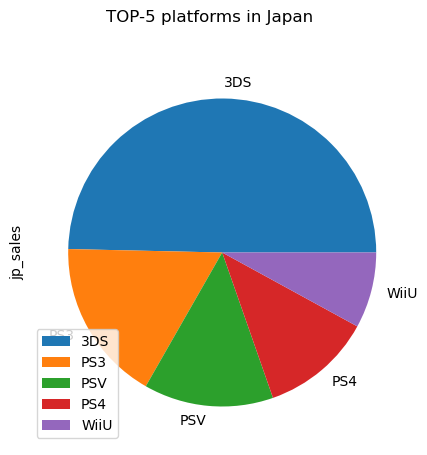

In [80]:
top_5_in_jp =  actual_platforms.pivot_table(index='platform',
                                                    values='jp_sales',
                                                    aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
print(top_5_in_jp)
top_5_in_jp.plot(kind='pie', subplots=True, title='ТОP-5 platforms in Japan', figsize=(10,5))
plt.show()

**Вывод 4.1.**
По приведенным данным можно отметить, что во всех 3-х регионах наибольшей популярностью пользуются консоли. Компьютеры появляются в ТОП-5 на европейском рынке.
Платформы PS3, PS4 во всех регионах входят в ТОП-3.

Рассмотрим как распределены жанры по рынкам сбыта.

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


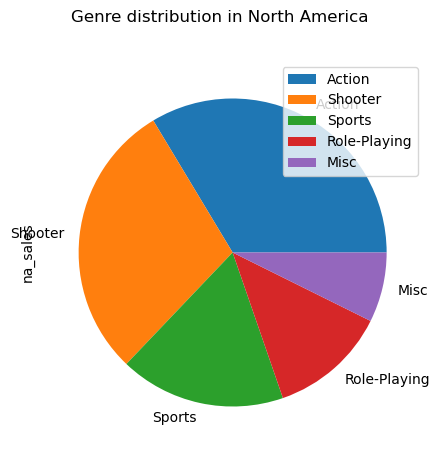

In [81]:
top_5_gen_in_na =  actual_platforms.pivot_table(index='genre',
                                                    values='na_sales',
                                                    aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
print(top_5_gen_in_na)

top_5_gen_in_na.plot(kind='pie', subplots=True, title='Genre distribution in North America', figsize=(10,5))
plt.show()

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


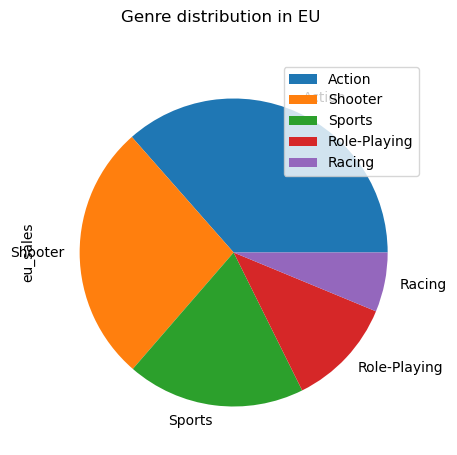

In [82]:
top_5_gen_in_eu =  actual_platforms.pivot_table(index='genre',
                                                    values='eu_sales',
                                                    aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
print(top_5_gen_in_eu)

top_5_gen_in_eu.plot(kind='pie', subplots=True, title='Genre distribution in EU', figsize=(10,5))
plt.show()

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


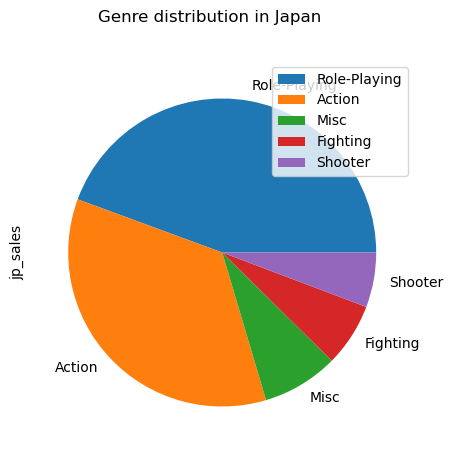

In [83]:
top_5_gen_in_jp =  actual_platforms.pivot_table(index='genre',
                                                    values='jp_sales',
                                                    aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
print(top_5_gen_in_jp)
top_5_gen_in_jp.plot(kind='pie', subplots=True, title='Genre distribution in Japan', figsize=(10,5))
plt.show()

**Conclusion 4.2.**
The top 3 in North America and Europe are completely the same. The most popular genre in all regions is Action.

The picture on the Japanese market is significantly different from America and Europe.

Let's consider the impact of the ESRB rating on sales in the regions.

rating,E,E10+,M,T,unknown_rating
eu_sales,83.36,42.69,145.32,41.95,78.91
jp_sales,15.14,5.89,14.11,20.59,85.05
na_sales,79.05,54.24,165.21,49.79,89.42


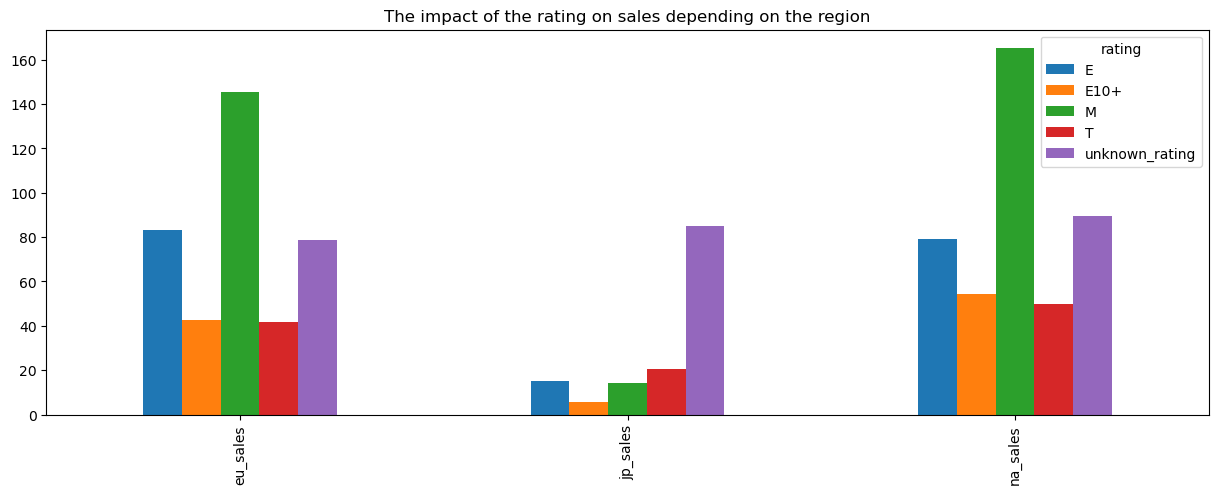

In [84]:
sales_rating=(actual_platforms
                        .pivot_table(columns = 'rating', \
                                     values=('na_sales','eu_sales', 'jp_sales'), aggfunc='sum' ));

display(sales_rating)

sales_rating.plot(kind='bar', figsize=(15,5),title='The impact of the rating on sales depending on the region');

As noted above, the ESRB rating is most common in the USA and Canada.

It should be noted that the picture of the impact of the ESRB rating in North America and Europe have a similar trend.
This is probably due to the fact that the age group and preferences of the "Western public" are similar.

Furthermore, the picture is different for Japan: the sales volume of games with an ESRB rating is several times lower than in North America and Europe.
This is probably due to the fact that in Japan, the most popular games that do not fall under the classification of the ESRB rating.

**Output. 4.3.**

1) In America and Europe, ESRB-rated games (by age groups) have the biggest sales M and E.

2) In Japan, the impact of the ESRB rating on sales is negligible. It can be assumed that in Japan the sales volume is lower or this rating is irrelevant for Japan. Therefore, additional analysis will require additional unloading on the missing data.

3) The unknown rating also occupies a significant share in North America and Europe, which confirms the need for additional unloading, not just ESRB.

In [56]:
temp = actual_platforms.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


rating
unknown_rating    977
M                 369
T                 333
E                 302
E10+              252
Name: count, dtype: int64

## 5. Testing hypotheses.

Let's test the hypotheses that the average user ratings of the Xbox One and PC platforms are the same, as well as that the average user ratings of the genres Action (Eng. "action", action games) and Sports (Eng. "sports competitions") are different.

As we will be comparing 2 samples, we will use the st.test.ind() method to test hypotheses

1. Hypothesis about Xbox One and PC user ratings.

```
H_0: Xbox One User Rating = PC User Rating`
H_1: Xbox One User Rating = PC User Rating`
alpha = 0.05
```

In [85]:
results = st.ttest_ind(
    actual_platforms[(actual_platforms['platform'] =='PC') & (actual_platforms['user_score'] >= 0)]['user_score'], 
    actual_platforms[(actual_platforms['platform'] =='XOne') & (actual_platforms['user_score'] >= 0)]['user_score'], equal_var = False)

alpha = .05# 


if results.pvalue < alpha:
    print(results.pvalue)
    print("We reject the null hypothesis")
else:
    print(results.pvalue)
    print("We can't reject the null hypothesisу")

0.14759594013430463
We can't reject the null hypothesisу


**Conclusion 1.** Hypothesis H0 is correct. The average user ratings of the Xbox One and PC platforms are the same.

2. The hypothesis about the popularization of the rating genres of action and sports.

```
H_0: Action Genre User Rating = Sports Genre User Rating`
H_1: Action Genre User Rating = Sport genre User Rating`
alpha = 0.05
```

In [88]:
results = st.ttest_ind(
    actual_platforms[(actual_platforms['genre'] =='Action') & (actual_platforms['user_score'] >= 0)]['user_score'], 
    actual_platforms[(actual_platforms['genre'] =='Sports') & (actual_platforms['user_score'] >= 0)]['user_score'], equal_var = False)# results = вызов метода для проверки гипотезы

alpha = .05# 

# вывод значения p-value на экран 
if results.pvalue < alpha:
    print(results.pvalue)
    print("We reject the null hypothesis")
else:
    print(results.pvalue)
    print("We can't reject the null hypothesis")

1.4460039700704315e-20
We reject the null hypothesis


**Conclusion 2.** The user rating of the Action genre differs from Sports.

## 6. Results of the research.

According to the results of the study, it was noted that:

1. The peak of sales of games worldwide is reached in the period 2008-2009.
2. Sales of games have been declining since 2010. This factor is due to the fact that some of the platforms are no longer being released at this point. Old platforms are being replaced by new ones.
3. The most promising and relevant platforms when planning sales for 2017 are PS3, X360, PS4, XOne, WiiU, Wii.
4. The PS4 has the highest level of sales in 2016.
5. There is no direct relationship between user ratings and game sales. At the same time, the following trend is observed for all platforms: the higher the critics' ratings, the higher the sales.
6. The most popular genres are Action, Shooter, Sports, Role-Playing, Adventure. The most stable genres by sales : Shooter, Sports, Platform
7. X360, PS3, PS4, XOne, 3DS are the leaders in sales of games in the American and European markets.
8. According to the ESRB rating, the best-selling games with a rating (age category) M, E.
9. For Japan and other markets, additional unloading by ratings is required, for the purpose of subsequent analysis. The impact of the ESRB rating in Japan is weakly expressed, compared with North America and Europe.
10. XOne user rating is approximately equal to PC.
11. The user rating of the Action genre does not correspond to Sports.

**Conclusion.**
As noticed above, the largest volume of sales in the American and European markets, so the online store is recommended to purchase for the purpose of subsequent resale and increase sales:
1) Games for X360, PS3, PS4, XOne, PC platforms.

2) With genres Action, Shooter, Sports, Role-Playing, Adventure

3) With an ESRB rating of M, T.

4) Money for an advertising company should first be directed to sales in North America and Europe.